# Analiza podatkov s pandas

[Pandas quick-start guide](http://pandas.pydata.org/pandas-docs/stable/10min.html)  
[Pandas documentation](http://pandas.pydata.org/pandas-docs/stable/)  
[Lecture notes on pandas](../predavanja/Analiza podatkov s knjižnico Pandas.ipynb)


### Naložimo pandas in podatke

In [11]:
# naložimo paket
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ker bomo delali z velikimi razpredelnicami, povemo, da naj se vedno izpiše le 10 vrstic
pd.set_option('display.max_rows', 10)

# izberemo interaktivni "notebook" stil risanja
%matplotlib notebook

# naložimo razpredelnico, s katero bomo delali
filmi = pd.read_csv("../../02-zajem-podatkov/predavanja/obdelani-podatki/filmi.csv")

Poglejmo si podatke.

In [12]:
filmi

,id,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,oznaka,opis
0,4972,The Birth of a Nation,195,1915,6.3,NaN,22363,10000000.0,NaN,The Stoneman family finds its friendship with ...
1,6864,Intolerance: Love's Struggle Throughout the Ages,163,1916,7.7,99.0,13970,2180000.0,NaN,"The story of a poor young woman, separated by ..."
2,9968,Broken Blossoms or The Yellow Man and the Girl,90,1919,7.3,NaN,9296,NaN,NaN,"A frail waif, abused by her brutal boxer fathe..."
3,10323,Das Cabinet des Dr. Caligari,76,1920,8.1,NaN,56089,NaN,NaN,"Hypnotist Dr. Caligari uses a somnambulist, Ce..."
4,12349,The Kid,68,1921,8.3,NaN,110278,5450000.0,NaN,"The Tramp cares for an abandoned child, but ev..."
...,...,...,...,...,...,...,...,...,...,...
9995,11390036,A Fall from Grace,115,2020,5.8,34.0,10414,NaN,NaN,"Disheartened since her ex-husband's affair, Gr..."
9996,11905962,Sputnik,113,2020,6.3,61.0,8285,NaN,NaN,The lone survivor of an enigmatic spaceship in...
9997,12393526,Bulbbul,94,2020,6.6,NaN,8381,NaN,NaN,A man returns home after years to find his bro...
9998,12567088,Raat Akeli Hai,149,2020,7.3,NaN,12232,NaN,NaN,The film follows a small town cop who is summo...


## Proučevanje podatkov

Razvrstite podatke po ocenah.

In [ ]:
filmi.sort_values("ocena", ascending=False)

Poberite stolpec ocen.

In [ ]:
filmi[["ocena"]]

Ukaza `filmi['ocena']` in `filmi[['ocena']]` sta različna:

In [18]:
print(type(filmi['ocena']))
print(type(filmi[['ocena']]))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


Stolpci objekta `DataFrame` so tipa `Series`. Z enojnimi oklepaji poberemo `Series`, z dvojnimi oklepaji pa `DataFrame` podtabelo. Večina operacij (grouping, joining, plotting,  filtering, ...) deluje na `DataFrame`. 

Tip `Series` se uporablja ko želimo npr. dodati stolpec.

Zaokrožite stolpec ocen z funkcijo `round()`.

In [ ]:
ocena_zaokrozeno = filmi[["ocena"]].round()
ocena_zaokrozeno

Dodajte zaokrožene vrednosti v podatke.

In [ ]:
filmi[["ocena_zaokrozeno"]] = ocena_zaokrozeno
filmi

Odstranite novo dodani stolpec z metodo `.drop()` z podanim `columns = ` argumentom.

In [ ]:
filmi.drop(columns="ocena_zaokrozeno")

### Opomba: slice
Izbira podtabele ustvari t.i. "rezino" oz. "slice".
Slice ni kopija tabele, temveč zgolj sklic na izvorno tabelo,
in je zato ne moremo spreminjati.
Če želimo kopijo, uporabimo metodo `.copy()` na rezini, ki jo nato lahko spreminjamo.


Izberite podtabelo s stolpci `naslov`, `leto`, in `glasovi`, kateri nato dodate solpec z zaokroženimi ocenami.

In [ ]:
rezina = filmi.loc[:, ["naslov", "leto", "glasovi"]]
rezina[["ocena_zaokrozeno"]] = ocena_zaokrozeno
rezina

### Filtracija

Ustvarite filter, ki izbere filme, ki so izšli pred 1930, in filter za filme po 2017.
Združite ju za izbor filmov, ki so izšli pred 1930 ali po 2017.

In [ ]:
filmi_pred_1930 = filmi[filmi.leto < 1930]
filmi_po_2017 = filmi[filmi.leto > 2017]
filmi_pred1930_po2017 = pd.concat([filmi_pred_1930, filmi_po_2017], join="outer", ignore_index=True)
filmi_pred1930_po2017
# oziroma z uporabo | = "ali":
# filmi[(filmi.leto < 1930)|(filmi.leto > 2017)]

Definirajte funkcijo, ki preveri ali niz vsebuje kvečjemu dve besedi. Nato s pomočjo `.apply()` izberite vse filme z imeni krajšimi od dveh besed in oceno nad 8.

In [ ]:
def dve_besedi(niz):
    """Funkcija vrne True, če niz vsebuje eno besedo"""
    if niz.count(' ') == 0:
        return True
    else:
        return False
filmi[
    (filmi["naslov"].apply(dve_besedi)) &
    (filmi.ocena > 8)
]

### Histogrami

Združite filme po ocenah in jih preštejte.

In [65]:
filmi.groupby("ocena").size()

ocena
1.0    1
1.1    1
1.4    3
1.5    1
1.6    3
      ..
8.9    7
9.0    6
9.1    1
9.2    1
9.3    2
Length: 82, dtype: int64

Naredite stolpični diagram teh podatkov.

<AxesSubplot: xlabel='ocena'>

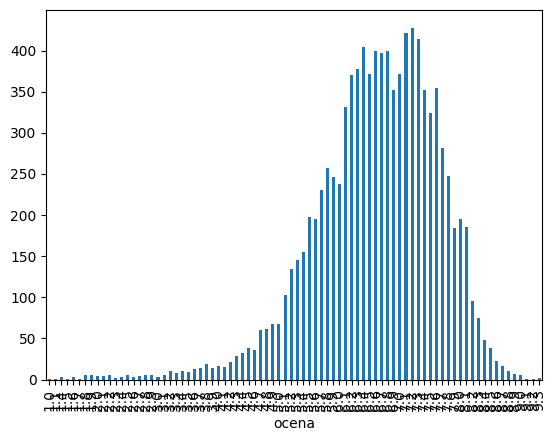

In [67]:
%matplotlib inline
filmi.groupby("ocena").size().plot.bar()

Tabele imajo metodo `.hist()`, ki omogoča izgradnjo histogramov za stolpce. Uporabite to metodo za prikaz poenostavljenih podatkov.

array([[<AxesSubplot: title={'center': 'ocena'}>]], dtype=object)

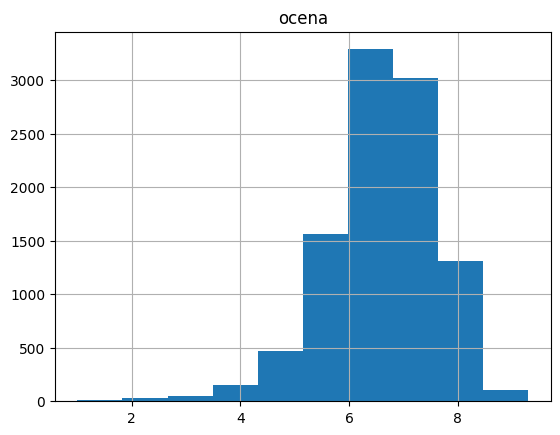

In [76]:
%matplotlib inline
filmi.hist(column="ocena")

### Izris povprečne dolžine filma glede na leto

<AxesSubplot: xlabel='leto'>

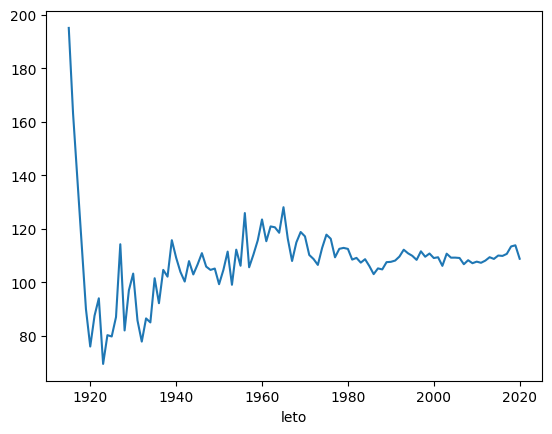

In [78]:
filmi.groupby("leto").dolzina.mean().plot()

### Izris skupnega zasluzka za posamezno leto

<AxesSubplot: xlabel='leto'>

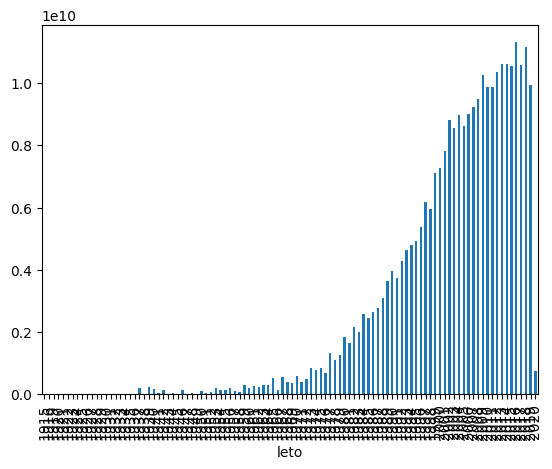

In [81]:
filmi.groupby("leto").zasluzek.sum().plot.bar()